In [1]:
#conda install pandas

In [2]:
#conda install matplotlib

In [3]:
#conda install statsmodels

In [4]:
#conda install numpy

In [5]:
#conda install -c conda-forge yfinance

In [6]:
#pip install arch


In [7]:
#Necessary Librarie
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import pymc3 as pm
import warnings

/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
#Defining Time Period and Tickers
start_date='2014-01-01'
end_date='2020-03-29'
ticker1='^GSPC'
ticker2='^FTSE'

In [9]:
#Downloading S&P 500 Adjusted Closing Price
SP500_Cprices= yf.download(ticker1,start_date,end_date)['Adj Close']
print(SP500_Cprices)

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
                 ...     
2020-03-23    2237.399902
2020-03-24    2447.330078
2020-03-25    2475.560059
2020-03-26    2630.070068
2020-03-27    2541.469971
Name: Adj Close, Length: 1570, dtype: float64


In [10]:
SP500_Cprices.to_csv("SP500_Cprices")

In [11]:
SP500=pd.read_csv("SP500_Cprices",index_col='Date')

In [12]:
SP500.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [13]:
#Calculating S&P 500 Daily Returns
SP500['Return'] = 100 * SP500.Close.pct_change().dropna()

In [14]:
#Calculating Rolling Volatility for S&P 500 Returns
SP500['Volatility']=SP500['Return'].rolling(window=20).std().dropna()

In [15]:
SP500.dropna(inplace=True)

In [102]:
SP500.head()

,Close,Return,Volatility
Date,,,
2014-01-31,1782.589966,-0.646530,0.791193
2014-02-03,1741.890015,-2.283192,0.924846
2014-02-04,1755.199951,0.764109,0.952015
2014-02-05,1751.640015,-0.202822,0.933074
2014-02-06,1773.430054,1.243979,0.989570


In [17]:
SP500.describe()

,Close,Return,Volatility
count,1550.000000,1550.000000,1550.000000
mean,2399.933844,0.028298,0.792117
std,400.424169,1.076257,0.560055
min,1741.890015,-11.984055,0.207155
25%,2061.352478,-0.294832,0.468495
50%,2345.444946,0.053496,0.648824
75%,2747.192566,0.470730,0.948186
max,3386.149902,9.382774,6.118244


In [18]:
#Downloading FTSE 100 Adjusted Closing Price
FTSE_Cprices= yf.download(ticker2,start_date,end_date)['Adj Close']
print(FTSE_Cprices)

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    6717.899902
2014-01-03    6730.700195
2014-01-06    6730.700195
2014-01-07    6755.500000
2014-01-08    6721.799805
                 ...     
2020-03-23    4993.899902
2020-03-24    5446.000000
2020-03-25    5688.200195
2020-03-26    5815.700195
2020-03-27    5510.299805
Name: Adj Close, Length: 1579, dtype: float64


In [19]:
FTSE_Cprices.to_csv("FTSE_Cprices")

In [20]:
FTSE=pd.read_csv("FTSE_Cprices",index_col='Date')

In [21]:
FTSE.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [22]:
#Calculating FTSE 100 Daily Returns
FTSE['Return'] = 100 * FTSE.Close.pct_change().dropna()

In [23]:
#Calculating Rolling Volatility for FTSE 100 Returns
FTSE['Volatility']=FTSE['Return'].rolling(window=20).std()

In [24]:
FTSE.dropna(inplace=True)

In [25]:
print(FTSE)

                  Close    Return  Volatility
Date                                         
2014-01-30  6538.500000 -0.088624    0.647529
2014-01-31  6510.399902 -0.429764    0.646058
2014-02-03  6465.700195 -0.686589    0.655050
2014-02-04  6449.299805 -0.253652    0.641333
2014-02-05  6457.899902  0.133349    0.642947
...                 ...       ...         ...
2020-03-23  4993.899902 -3.793248    3.473790
2020-03-24  5446.000000  9.053047    4.225981
2020-03-25  5688.200195  4.447304    4.399480
2020-03-26  5815.700195  2.241482    4.413114
2020-03-27  5510.299805 -5.251309    4.498435

[1559 rows x 3 columns]


In [26]:
FTSE.describe()

,Close,Return,Volatility
count,1559.000000,1559.000000,1559.000000
mean,6960.921676,-0.006081,0.814527
std,495.421639,0.991611,0.423983
min,4993.899902,-10.873819,0.230632
25%,6678.199951,-0.454266,0.559997
50%,7016.899902,0.038762,0.716369
75%,7367.199951,0.471391,0.925860
max,7877.500000,9.053047,4.498435


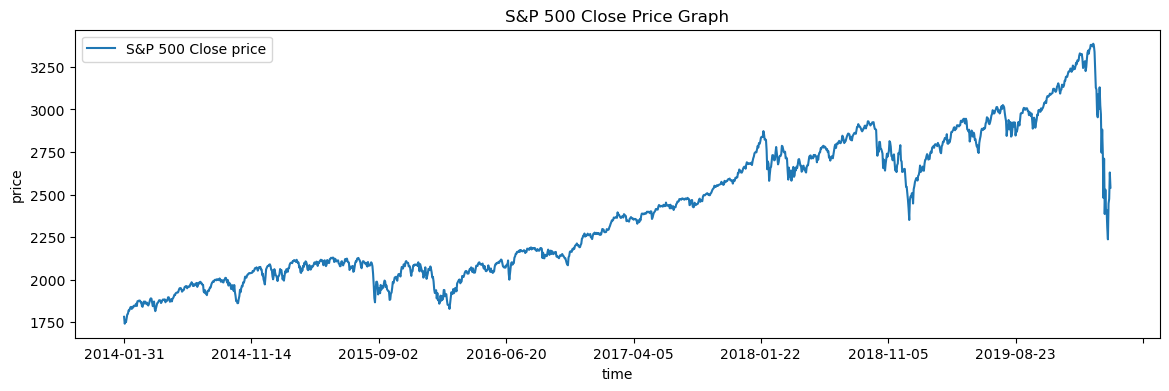

In [27]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Close", label="S&P 500 Close price", ax=ax)
ax.set(xlabel="time", ylabel="price")
ax.set_title("S&P 500 Close Price Graph")
ax.legend()
plt.show()

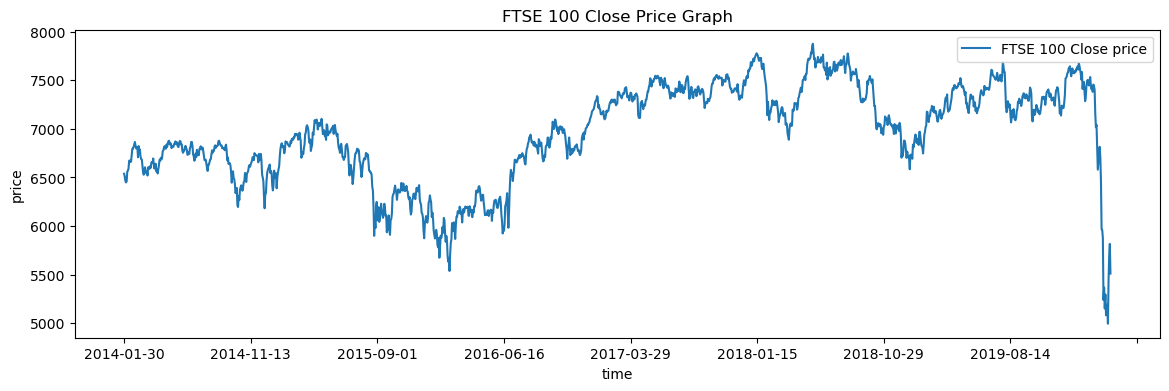

In [28]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Close", label="FTSE 100 Close price", ax=ax)
ax.set(xlabel="time", ylabel="price")
ax.set_title("FTSE 100 Close Price Graph")
ax.legend()
plt.show()

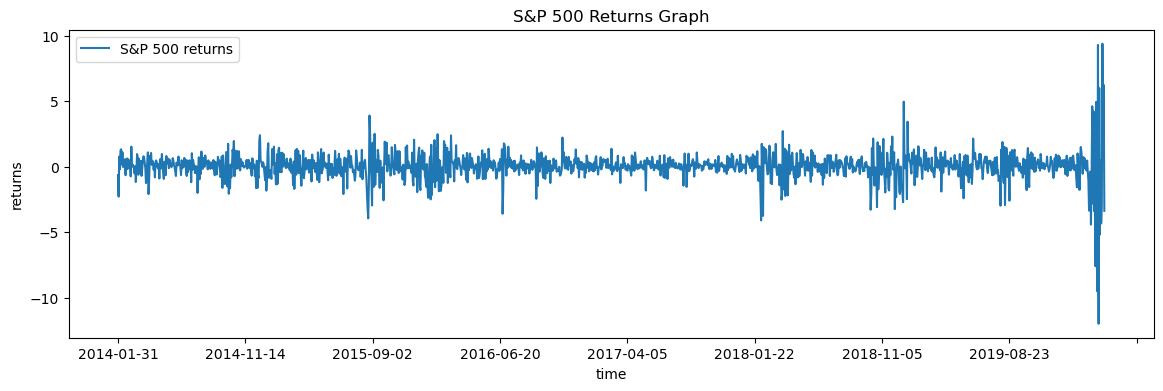

In [29]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Return", label="S&P 500 returns", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("S&P 500 Returns Graph")
ax.legend()
plt.show()

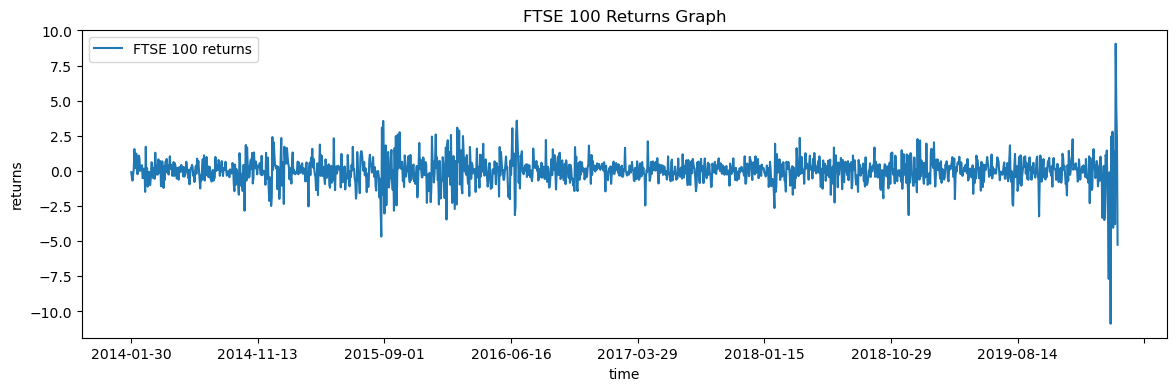

In [30]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Return", label="FTSE 100 returns", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("FTSE 100 Returns Graph")
ax.legend()
plt.show()

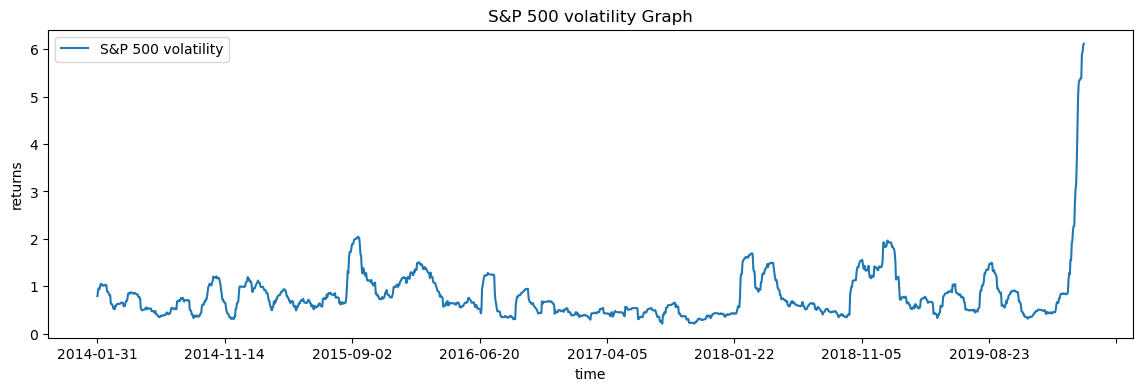

In [31]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Volatility", label="S&P 500 volatility", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("S&P 500 volatility Graph")
ax.legend()
plt.show()

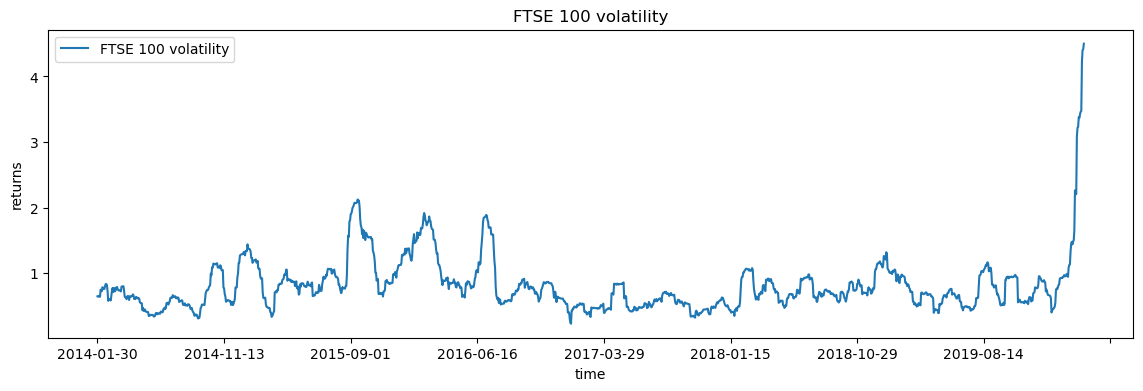

In [32]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Volatility", label="FTSE 100 volatility", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("FTSE 100 volatility")
ax.legend()
plt.show()

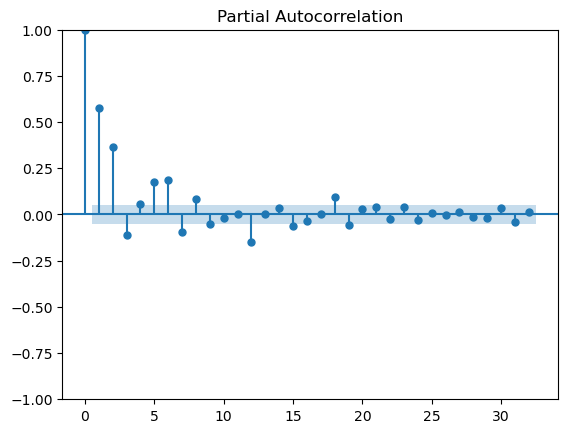

In [33]:
plot_pacf(SP500.Return**2)
plt.show()

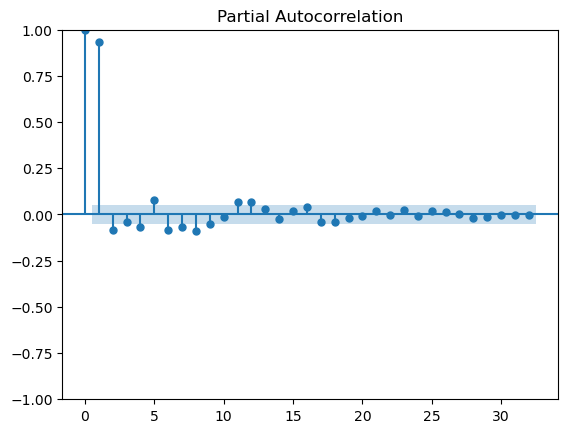

In [34]:
plot_pacf(SP500.Volatility**2)
plt.show()

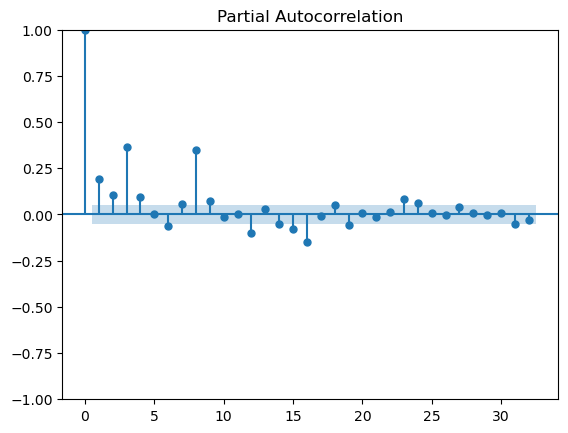

In [35]:
plot_pacf(FTSE.Return**2)
plt.show()

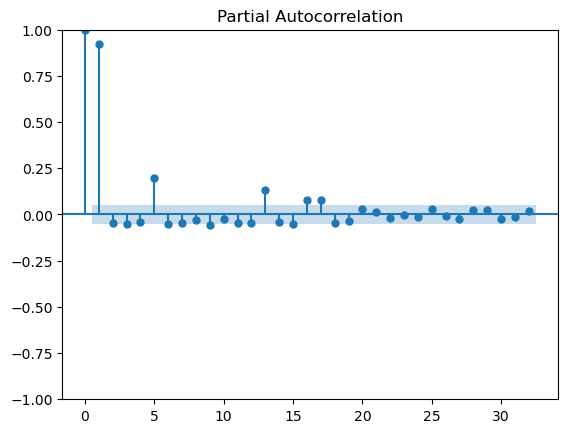

In [36]:
plot_pacf(FTSE.Volatility**2)
plt.show()

In [37]:
test_size1 = 20

In [38]:
test_size2 = 20

In [39]:
train1, test1 = SP500.Return[:-test_size1], SP500.Return[-test_size1:]

In [40]:
train2, test2 = FTSE.Return[:-test_size2], FTSE.Return[-test_size2:]

In [103]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=1,q=1,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 2238.432868566622
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1780.4599613237303
Iteration:     15,   Func. Count:    107,   Neg. LLF: 1618.7807715495298
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1618.7807715495298
            Iterations: 16
            Function evaluations: 112
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1618.78
Distribution:      Standardized Student's t   AIC:                           3247.56
Method:                  Maximum Likelihood   BIC:                           3274.23
                                              No. Observations:                 1530
Date:                      Mon, Sep 11 2023   Df Residuals:                     1529
Time:                              23:47:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0831  1.364e-02      6.091  1.125e-09 [5.633e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0295  8.065e-03      3.662  2.501e-04 [1.373e-02,4.535e-02]
alpha[1]       0.2211  3.604e-02      6.136  8.485e-10     [  0.151,  0.292]
beta[1]        0.7631  3.150e-02     24.226 1.193e-129     [  0.701,  0.825]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.9045      0.642      7.644  2.108e-14 [  3.647,  6.162]
========================================================================

Covariance estimator: robust
"""

In [104]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=1,q=2,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1671.243563210772
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1619.3227101603761
Iteration:     15,   Func. Count:    119,   Neg. LLF: 1618.780772008618
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1618.7807715281388
            Iterations: 16
            Function evaluations: 126
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1618.78
Distribution:      Standardized Student's t   AIC:                           3249.56
Method:                  Maximum Likelihood   BIC:                           3281.56
                                              No. Observations:                 1530
Date:                      Mon, Sep 11 2023   Df Residuals:                     1529
Time:                              23:48:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0831  1.363e-02      6.096  1.090e-09 [5.636e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0295  8.313e-03      3.553  3.808e-04 [1.324e-02,4.583e-02]
alpha[1]       0.2211  4.548e-02      4.863  1.157e-06     [  0.132,  0.310]
beta[1]        0.7631      0.242      3.156  1.600e-03     [  0.289,  1.237]
beta[2]        0.0000      0.211      0.000      1.000     [ -0.414,  0.414]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.9046      0.642      7.643  2.121e-14 [  3.647,  6.162]
========================================================================

Covariance estimator: robust
"""

In [105]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=2,q=2,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     50,   Neg. LLF: 1883.9361817451108
Iteration:     10,   Func. Count:     94,   Neg. LLF: 1617.7394543556306
Iteration:     15,   Func. Count:    133,   Neg. LLF: 1617.7328327948453
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1617.732832794864
            Iterations: 15
            Function evaluations: 133
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1617.73
Distribution:      Standardized Student's t   AIC:                           3249.47
Method:                  Maximum Likelihood   BIC:                           3286.80
                                              No. Observations:                 1530
Date:                      Mon, Sep 11 2023   Df Residuals:                     1529
Time:                              23:48:14   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0830  1.368e-02      6.065  1.318e-09 [5.617e-02,  0.110]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0533  5.061e-02      1.054      0.292 [-4.586e-02,  0.153]
alpha[1]       0.1885  3.944e-02      4.779  1.758e-06    [  0.111,  0.266]
alpha[2]       0.2109      0.342      0.617      0.537    [ -0.459,  0.881]
beta[1]    2.7926e-09      1.574  1.774e-09      1.000    [ -3.085,  3.085]
beta[2]        0.5729      1.211      0.473      0.636    [ -1.801,  2.947]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.8859      0.637      7.671  1.702e-14 [  3.638,  6.134]
========================================================================

Covariance estimator: robust
"""

In [106]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=2,q=1,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1647.11803590728
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1618.9077157465927
Iteration:     15,   Func. Count:    122,   Neg. LLF: 1618.6266251928234
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1618.626624103964
            Iterations: 17
            Function evaluations: 135
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1618.63
Distribution:      Standardized Student's t   AIC:                           3249.25
Method:                  Maximum Likelihood   BIC:                           3281.25
                                              No. Observations:                 1530
Date:                      Mon, Sep 11 2023   Df Residuals:                     1529
Time:                              23:48:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0829  1.362e-02      6.088  1.142e-09 [5.623e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0320  1.010e-02      3.164  1.554e-03 [1.216e-02,5.175e-02]
alpha[1]       0.2034  4.670e-02      4.356  1.327e-05     [  0.112,  0.295]
alpha[2]       0.0326  5.967e-02      0.547      0.585  [-8.433e-02,  0.150]
beta[1]        0.7472  4.612e-02     16.200  5.062e-59     [  0.657,  0.838]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.8953      0.641      7.643  2.123e-14 [  3.640,  6.151]
========================================================================

Covariance estimator: robust
"""

In [42]:

from pandas.tseries.offsets import BDay
predictions1 = SP500_results_garch.forecast(horizon=7)
future_dates1 = [pd.to_datetime(train1.index[-1]) + BDay(i) for i in range(1,8)]
pred1 = pd.Series(np.sqrt(predictions1.variance.values[-1,:]), index=future_dates1)

Text(0.5, 1.0, 'Volatility Prediction S&P 500- Next 7 Days')

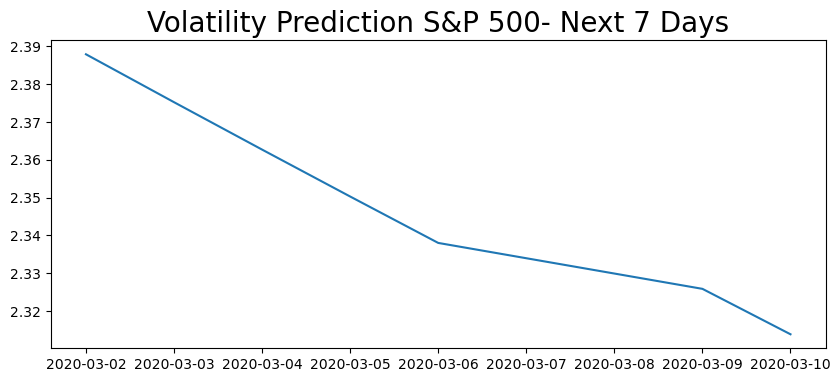

In [43]:
plt.figure(figsize=(10,4))
plt.plot(pred1)
plt.title('Volatility Prediction S&P 500- Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Returns S&P 500- Next 7 Days')

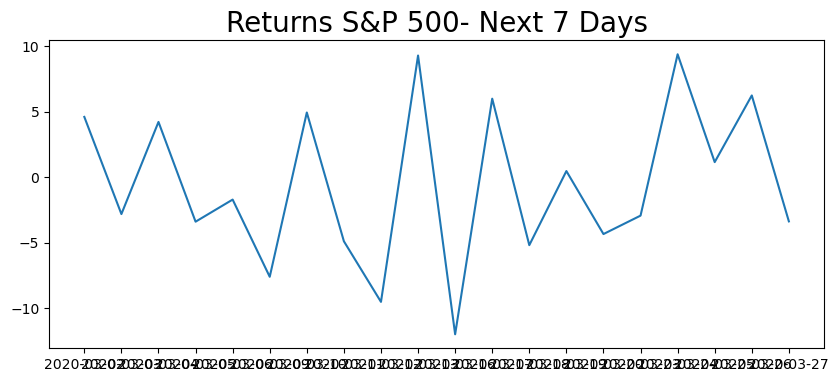

In [44]:
plt.figure(figsize=(10,4))
plt.plot(SP500.Return[-test_size1:])
plt.title('Returns S&P 500- Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Actual volatility S&P 500- Next 7 Days')

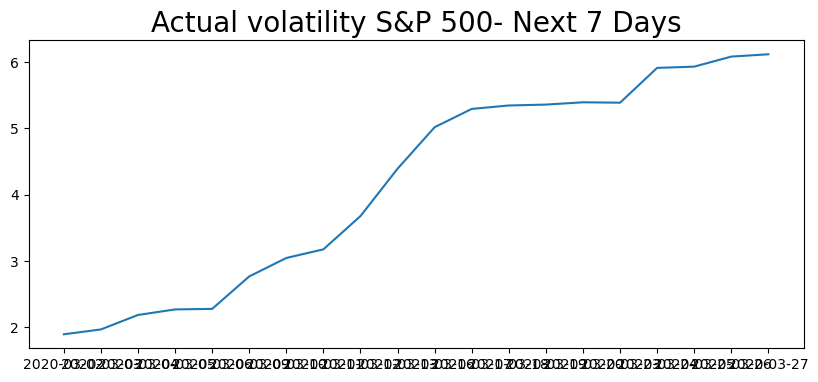

In [45]:
plt.figure(figsize=(10,4))
plt.plot(SP500.Volatility[-test_size1:])
plt.title('Actual volatility S&P 500- Next 7 Days', fontsize=20)

In [107]:
FTSE_model_garch= arch_model(train2[1:],vol="GARCH",p=1,q=1,dist='t')
FTSE_results_garch=FTSE_model_garch.fit(update_freq=5)
FTSE_results_garch.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1819.6303664132386
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1773.9559122482747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1773.9550775542982
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1773.96
Distribution:      Standardized Student's t   AIC:                           3557.91
Method:                  Maximum Likelihood   BIC:                           3584.60
                                              No. Observations:                 1538
Date:                      Mon, Sep 11 2023   Df Residuals:                     1537
Time:                              23:55:40   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0351  1.720e-02      2.041  4.125e-02 [1.394e-03,6.881e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0425  1.471e-02      2.887  3.891e-03 [1.364e-02,7.132e-02]
alpha[1]       0.1601  3.254e-02      4.920  8.633e-07   [9.634e-02,  0.224]
beta[1]        0.7908  4.298e-02     18.400  1.316e-75     [  0.707,  0.875]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.4287      0.947      6.790  1.124e-11 [  4.573,  8.284]
========================================================================

Covariance estimator: robust
"""

In [108]:
FTSE_model_garch= arch_model(train2[1:],vol="GARCH",p=1,q=2,dist='t')
FTSE_results_garch=FTSE_model_garch.fit(update_freq=5)
FTSE_results_garch.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 3285.2151576000524
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1772.4365667688367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1772.4365500571507
            Iterations: 13
            Function evaluations: 104
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1772.44
Distribution:      Standardized Student's t   AIC:                           3556.87
Method:                  Maximum Likelihood   BIC:                           3588.90
                                              No. Observations:                 1538
Date:                      Mon, Sep 11 2023   Df Residuals:                     1537
Time:                              23:56:08   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0371  1.729e-02      2.149  3.165e-02 [3.265e-03,7.103e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0535  1.793e-02      2.985  2.838e-03 [1.837e-02,8.864e-02]
alpha[1]       0.2138  4.127e-02      5.181  2.209e-07     [  0.133,  0.295]
beta[1]        0.3195      0.126      2.530  1.142e-02   [7.194e-02,  0.567]
beta[2]        0.4054      0.112      3.608  3.085e-04     [  0.185,  0.626]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.6018      1.001      6.596  4.224e-11 [  4.640,  8.563]
========================================================================

Covariance estimator: robust
"""

In [109]:
FTSE_model_garch= arch_model(train2[1:],vol="GARCH",p=2,q=2,dist='t')
FTSE_results_garch=FTSE_model_garch.fit(update_freq=5)
FTSE_results_garch.summary()

Iteration:      5,   Func. Count:     49,   Neg. LLF: 3609.526728442115
Iteration:     10,   Func. Count:     95,   Neg. LLF: 1772.566022968635
Iteration:     15,   Func. Count:    137,   Neg. LLF: 1772.4271451330528
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1772.427143708118
            Iterations: 17
            Function evaluations: 152
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1772.43
Distribution:      Standardized Student's t   AIC:                           3558.85
Method:                  Maximum Likelihood   BIC:                           3596.22
                                              No. Observations:                 1538
Date:                      Mon, Sep 11 2023   Df Residuals:                     1537
Time:                              23:56:09   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0370  1.733e-02      2.138  3.254e-02 [3.081e-03,7.101e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0553  2.198e-02      2.518  1.179e-02 [1.227e-02,9.843e-02]
alpha[1]       0.2107  4.599e-02      4.582  4.611e-06     [  0.121,  0.301]
alpha[2]   9.2241e-03  5.299e-02      0.174      0.862  [-9.464e-02,  0.113]
beta[1]        0.2923      0.153      1.905  5.675e-02  [-8.395e-03,  0.593]
beta[2]        0.4242      0.113      3.753  1.746e-04     [  0.203,  0.646]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.5980      1.001      6.593  4.321e-11 [  4.636,  8.560]
========================================================================

Covariance estimator: robust
"""

In [110]:
FTSE_model_garch= arch_model(train2[1:],vol="GARCH",p=2,q=1,dist='t')
FTSE_results_garch=FTSE_model_garch.fit(update_freq=5)
FTSE_results_garch.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1779.1025094456536
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1773.9585356775406
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1773.9550775844677
            Iterations: 13
            Function evaluations: 105
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1773.96
Distribution:      Standardized Student's t   AIC:                           3559.91
Method:                  Maximum Likelihood   BIC:                           3591.94
                                              No. Observations:                 1538
Date:                      Mon, Sep 11 2023   Df Residuals:                     1537
Time:                              23:56:09   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0351  1.725e-02      2.035  4.186e-02 [1.293e-03,6.890e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0425  1.747e-02      2.432  1.502e-02 [8.242e-03,7.671e-02]
alpha[1]       0.1601  4.376e-02      3.659  2.533e-04   [7.435e-02,  0.246]
alpha[2]       0.0000  5.300e-02      0.000      1.000     [ -0.104,  0.104]
beta[1]        0.7908  5.468e-02     14.462  2.105e-47     [  0.684,  0.898]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.4288      0.959      6.706  1.997e-11 [  4.550,  8.308]
========================================================================

Covariance estimator: robust
"""

In [47]:
predictions2 = FTSE_results_garch.forecast(horizon=7)
future_dates2 = [pd.to_datetime(train2.index[-1]) + timedelta(days=i) for i in range(1,8)]
pred2 = pd.Series(np.sqrt(predictions2.variance.values[-1,:]), index=future_dates2)

Text(0.5, 1.0, 'Volatility Prediction FTSE 100 - Next 7 Days')

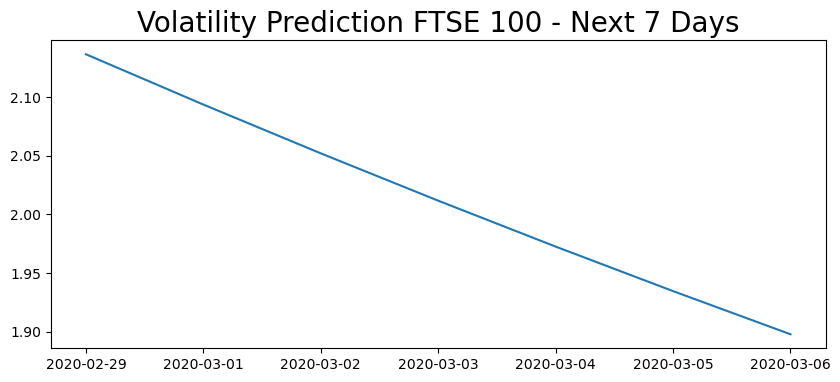

In [48]:

plt.figure(figsize=(10,4))
plt.plot(pred2)
plt.title('Volatility Prediction FTSE 100 - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Returns FTSE 100 - Next 7 Days')

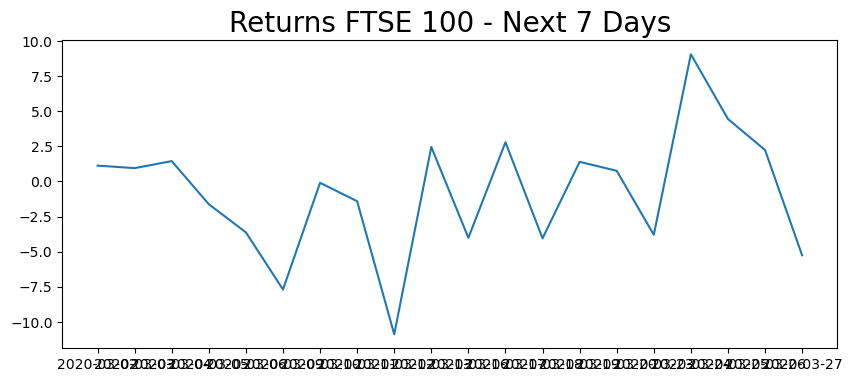

In [49]:
plt.figure(figsize=(10,4))
plt.plot(FTSE.Return[-test_size1:])
plt.title('Returns FTSE 100 - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Actula volatility FTSE 100 - Next 7 Days')

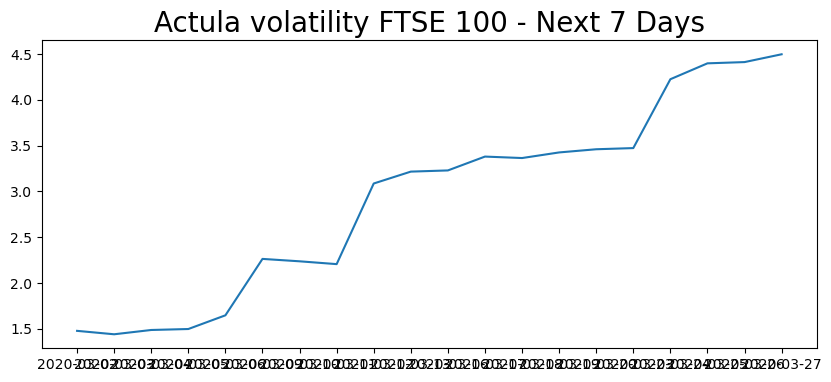

In [50]:
plt.figure(figsize=(10,4))
plt.plot(FTSE.Volatility[-test_size1:])
plt.title('Actula volatility FTSE 100 - Next 7 Days', fontsize=20)

In [51]:
test_size1 = 20

In [52]:
test_size2 = 20

In [53]:
train1, test1 = SP500.Return[:-test_size1], SP500.Return[-test_size1:]

In [54]:
train2, test2 = FTSE.Return[:-test_size2], FTSE.Return[-test_size2:]

In [111]:
from scipy.stats import t
df1, loc, scale = t.fit(train1)
print(df1)
df2, loc, scale = t.fit(train2)
print(df2)

2.7407404841551104
3.8312542147417608


In [112]:
rolling_predictions1 = []
n_samples = 50
# Loop through the test size
for i in range(test_size1):
    # Use observed returns for the first iteration
    if i == 0:
        train_data = SP500.Return[:-test_size1]
    else:
        # Concatenate observed returns with simulated return for subsequent iterations
        train_data = np.append(SP500.Return[:-test_size1], simulated_return)

    # Train GARCH(1,1) model
    model = arch_model(train_data, p=1, q=1)
    model_fit = model.fit(disp='off', update_freq=5)
    pred = model_fit.forecast(horizon=1)
    predicted_volatility = np.sqrt(pred.variance.values[-1,:][0])
    
    # Generate simulated return using forecasted volatility
    previous_return = train_data[-1]
    
    posilble_return = np.zeros(n_samples)
    
    for j in range(n_samples):
        posilble_return[j] = previous_return + t.rvs(df=df1, loc=0, scale=predicted_volatility)
    simulated_return=np.mean(posilble_return)

    # Append predicted volatility
    rolling_predictions1.append(predicted_volatility)

In [113]:
rolling_predictions1 = pd.Series(rolling_predictions1, index=SP500.Return.index[-test_size1:])

percent_Return=SP500.Return[-test_size1:]
percent_Volatility=SP500.Volatility[-test_size1:]
scaling_factor = 100 
rolling_predictions1=np.log1p(1 + rolling_predictions1 * scaling_factor)
SP500_Actual_test_Return=np.log1p(1 + percent_Return * scaling_factor)
SP500_Actual_test_Volatility=np.log1p(1 + percent_Volatility * scaling_factor)

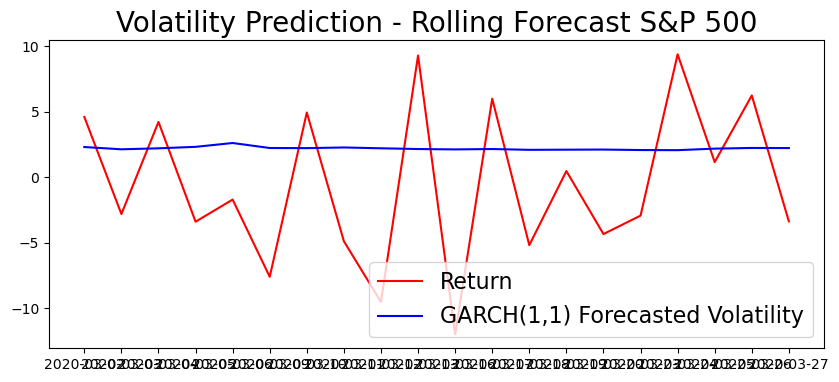

In [114]:
plt.figure(figsize=(10,4))
true, = plt.plot(SP500.Return[-test_size1:],color='red')
preds, = plt.plot(rolling_predictions1,color='blue')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=20)
plt.legend(['Return', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

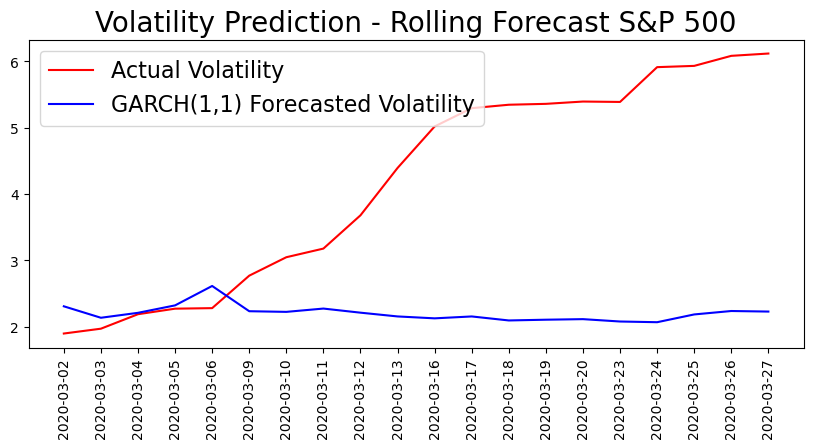

In [115]:
plt.figure(figsize=(10,4))
true, = plt.plot(SP500.Volatility[-test_size1:],color='red')
preds, = plt.plot(rolling_predictions1,color='blue')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=20)
plt.legend(['Actual Volatility', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

In [116]:
rolling_predictions2 = []
n_samples = 50
# Loop through the test size
for i in range(test_size2):
    # Use observed returns for the first iteration
    if i == 0:
        train_data = FTSE.Return[:-test_size2]
    else:
        # Concatenate observed returns with simulated return for subsequent iterations
        train_data = np.append(FTSE.Return[:-test_size2], simulated_return)

    # Train GARCH(1,1) model
    model = arch_model(train_data, p=1, q=1)
    model_fit = model.fit(disp='off', update_freq=5)
    pred = model_fit.forecast(horizon=1)
    predicted_volatility = np.sqrt(pred.variance.values[-1,:][0])
    
    # Generate simulated return using forecasted volatility
    previous_return = train_data[-1]
    
    posilble_return = np.zeros(n_samples)
    
    for j in range(n_samples):
        posilble_return[j] = previous_return + t.rvs(df=df2, loc=0, scale=predicted_volatility)
    simulated_return=np.mean(posilble_return)

    # Append predicted volatility
    rolling_predictions2.append(predicted_volatility)

In [117]:
rolling_predictions2 = pd.Series(rolling_predictions2, index=FTSE.Return.index[-test_size2:])

scaling_factor = 100 
rolling_predictions1=np.log(1 + rolling_predictions1 * scaling_factor)
FTSE_Actual_test_Return=np.log(1 + FTSE.Return[-test_size1:] * scaling_factor)
FTSE_Actual_test_Volatility=np.log(1 + FTSE.Volatility[-test_size1:] * scaling_factor)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

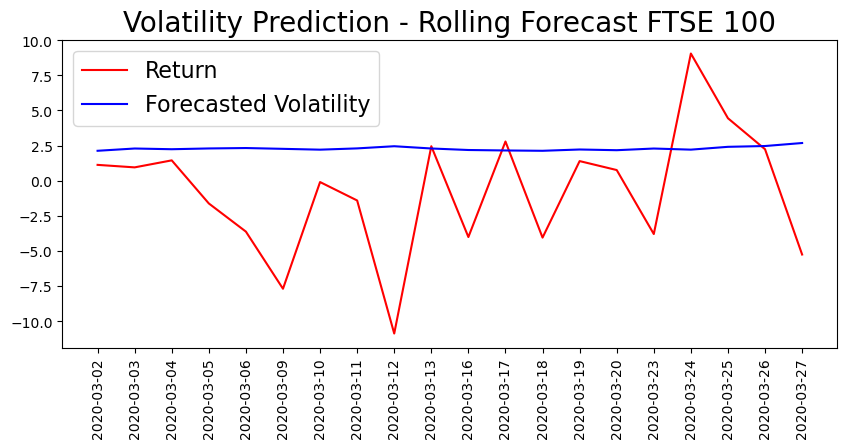

In [118]:
plt.figure(figsize=(10,4))
true, = plt.plot(FTSE.Return[-test_size2:],color='red')
preds, = plt.plot(rolling_predictions2,color='blue')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=20)
plt.legend(['Return', 'Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

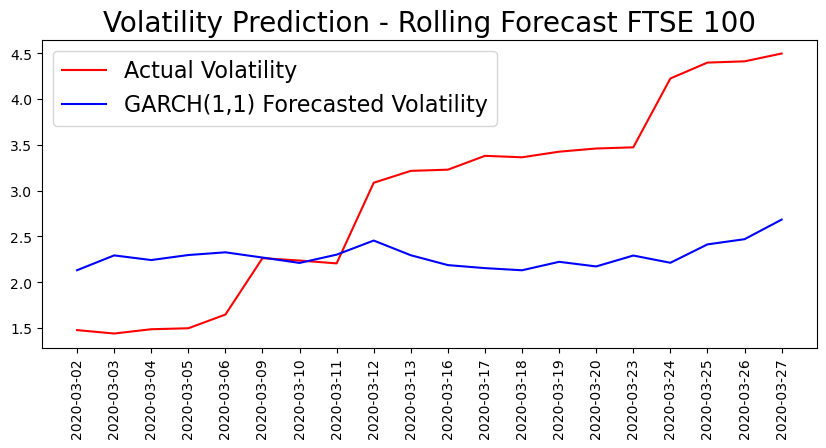

In [119]:
plt.figure(figsize=(10,4))
true, = plt.plot(FTSE.Volatility[-test_size2:],color='red')
preds, = plt.plot(rolling_predictions2,color='blue')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=20)
plt.legend(['Actual Volatility', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

In [63]:
def mean_squared_error(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Mean Squared Error (MSE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mse = np.mean((actual - predicted) ** 2)
    return mse

In [64]:
def root_mean_squared_error(actual, predicted):
    """
    Calculate the Root Mean Squared Error (RMSE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Root Mean Squared Error (RMSE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [65]:
def mean_absolute_error(actual, predicted):
    """
    Calculate the Mean Absolute Error (MAE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Mean Absolute Error (MAE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mae = np.mean(np.abs(actual - predicted))
    return mae

In [120]:
mse = mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Mean Absolute Error (MAE) S&P 500:", mae)

Mean Squared Error (MSE) S&P 500: 6.46455113544408
Root Mean Squared Error (RMSE) S&P 500: 2.5425481579399984
Mean Absolute Error (MAE) S&P 500: 2.0717572835708635


In [121]:
mse = mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Mean Absolute Error (MAE) FTSE 100:", mae)

Mean Squared Error (MSE) FTSE 100: 1.3883777107740671
Root Mean Squared Error (RMSE) FTSE 100: 1.1782944075120052
Mean Absolute Error (MAE) FTSE 100: 1.017836111881588


In [68]:
# Calculate log returns
SP500_Logreturns = np.log(SP500['Close'] / SP500['Close'].shift(1)).dropna()

In [69]:
SP500_train = SP500_Logreturns[:-20]
SP500_test = SP500_Logreturns[-20:]

In [70]:
Avolatility=SP500_Logreturns.rolling(window=20).std().dropna()

In [71]:
SP500_test_volatility=Avolatility[-len(SP500_test):]

In [72]:
print(SP500_test_volatility)

Date
2020-03-02    0.019007
2020-03-03    0.019745
2020-03-04    0.021847
2020-03-05    0.022701
2020-03-06    0.022774
2020-03-09    0.028028
2020-03-10    0.030693
2020-03-11    0.032028
2020-03-12    0.037497
2020-03-13    0.044121
2020-03-16    0.051097
2020-03-17    0.053769
2020-03-18    0.054246
2020-03-19    0.054391
2020-03-20    0.054709
2020-03-23    0.054653
2020-03-24    0.059617
2020-03-25    0.059829
2020-03-26    0.061349
2020-03-27    0.061669
Name: Close, dtype: float64


In [73]:
n_samples = 2000
n_forecast = len(SP500_test)

In [74]:
SP500_forecasted_volatility = np.zeros(n_forecast)
forecasted_returns = np.zeros(n_forecast)

In [75]:

for i in range(n_forecast):
    model = pm.Model()
    with model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(SP500_train) + i)
        r = pm.StudentT('r', nu=nu, lam=pm.math.exp(-2*s), observed=np.concatenate([SP500_train, forecasted_returns[:i]]))

    with model:
        trace = pm.sample(n_samples)

    s_current = trace['s'][:, -1].mean()  # estimate current volatility state
    
    forecast_samples = np.zeros(n_samples)
    
    for j in range(n_samples):
        sigma = trace['sigma'][j]
        nu = trace['nu'][j]
        s_next = np.random.normal(loc=s_current, scale=sigma)
        r_next = np.random.standard_t(nu) * np.exp(s_next)
        forecast_samples[j] = r_next
    forecasted_returns[i] = np.mean(forecast_samples)
    SP500_forecasted_volatility[i] = np.std(forecast_samples)

/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 89 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GAR

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 102 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 113 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 104 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 114 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 115 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 139 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 124 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 137 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 143 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 149 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 130 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 114 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 109 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 116 seconds.
The acceptance probability does not match the target. It is 0.717841861455708, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 115 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 111 seconds.
The acceptance probability does not match the target. It is 0.7148137911863593, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version o

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 113 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 105 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 106 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


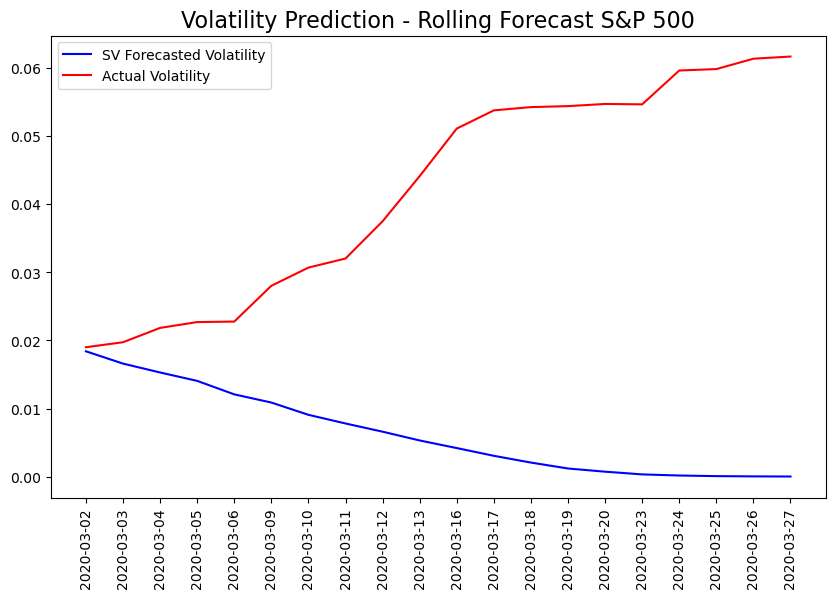

In [76]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(SP500_test.index, SP500_forecasted_volatility, label='SV Forecasted Volatility',color='blue')
plt.plot(SP500_test.index, SP500_test_volatility, label='Actual Volatility',color='red')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=16)
plt.show()

In [77]:
mse = mean_squared_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Mean Absolute Error (MAE) S&P 500:", mae)

Mean Squared Error (MSE) S&P 500: 0.0017440636064264328
Root Mean Squared Error (RMSE) S&P 500: 0.041761987577537935
Mean Absolute Error (MAE) S&P 500: 0.03577532867763591


In [78]:
# Calculate log returns
FTSE_Logreturns = np.log(FTSE['Close'] / FTSE['Close'].shift(1)).dropna()

In [79]:
FTSE_train = FTSE_Logreturns[:-20]
FTSE_test = FTSE_Logreturns[-20:]

In [80]:
Avolatility=FTSE_Logreturns.rolling(window=20).std().dropna()

In [81]:
FTSE_test_volatility=Avolatility[-len(FTSE_test):]

In [82]:
print(FTSE_test_volatility)

Date
2020-03-02    0.014944
2020-03-03    0.014578
2020-03-04    0.015038
2020-03-05    0.015140
2020-03-06    0.016672
2020-03-09    0.023234
2020-03-10    0.022974
2020-03-11    0.022661
2020-03-12    0.032248
2020-03-13    0.033503
2020-03-16    0.033613
2020-03-17    0.035080
2020-03-18    0.034902
2020-03-19    0.035507
2020-03-20    0.035854
2020-03-23    0.035982
2020-03-24    0.042911
2020-03-25    0.044604
2020-03-26    0.044776
2020-03-27    0.045653
Name: Close, dtype: float64


In [83]:
n_samples = 2000
n_forecast = len(FTSE_test)

In [84]:
FTSE_forecasted_volatility = np.zeros(n_forecast)
forecasted_returns = np.zeros(n_forecast)

In [85]:
for i in range(n_forecast):
    model = pm.Model()
    with model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(FTSE_train) + i)
        r = pm.StudentT('r', nu=nu, lam=pm.math.exp(-2*s), observed=np.concatenate([FTSE_train, forecasted_returns[:i]]))

    with model:
        trace = pm.sample(n_samples)

    s_current = trace['s'][:, -1].mean()  # estimate current volatility state
    
    forecast_samples = np.zeros(n_samples)
    
    for j in range(n_samples):
        sigma = trace['sigma'][j]
        nu = trace['nu'][j]
        s_next = np.random.normal(loc=s_current, scale=sigma)
        r_next = np.random.standard_t(nu) * np.exp(s_next)
        forecast_samples[j] = r_next
    forecasted_returns[i] = np.mean(forecast_samples)
    FTSE_forecasted_volatility[i] = np.std(forecast_samples)

/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 232 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 231 seconds.
The acceptance probability does not match the target. It is 0.6997693376234858, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version o

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 225 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 235 seconds.
The acceptance probability does not match the target. It is 0.7200748357217797, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version o

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 247 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 245 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 223 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 212 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 187 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 170 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 195 seconds.
The acceptance probability does not match the target. It is 0.8847714571943516, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pack

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 197 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 178 seconds.
The acceptance probability does not match the target. It is 0.7133118281866213, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pack

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 165 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GA

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 167 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 167 seconds.
The acceptance probability does not match the target. It is 0.6866078267813955, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pack

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 157 seconds.
The acceptance probability does not match the target. It is 0.6591918053335387, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pack

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 133 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 149 seconds.
The acceptance probability does not match the target. It is 0.9026001444665347, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_9293/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pack

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 104 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


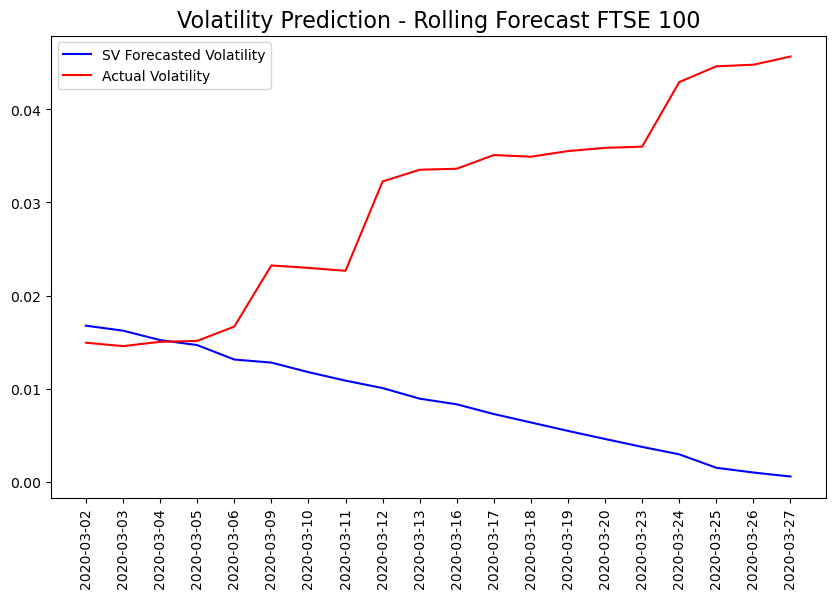

In [86]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(FTSE_test.index, FTSE_forecasted_volatility, label='SV Forecasted Volatility',color='blue')
plt.plot(FTSE_test.index, FTSE_test_volatility, label='Actual Volatility', color='red')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=16)
plt.show()

In [87]:
mse = mean_squared_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Mean Absolute Error (MAE) FTSE 100:", mae)

Mean Squared Error (MSE) FTSE 100: 0.0007012242290024358
Root Mean Squared Error (RMSE) FTSE 100: 0.026480638757447595
Mean Absolute Error (MAE) FTSE 100: 0.02173595396739357


In [88]:
print(SP500_forecasted_volatility)

[1.84079453e-02 1.66066203e-02 1.53031223e-02 1.40699492e-02
 1.20930966e-02 1.08901920e-02 9.09078840e-03 7.81740441e-03
 6.61542575e-03 5.32583279e-03 4.21099856e-03 3.07494834e-03
 2.08283302e-03 1.21288453e-03 7.46801721e-04 3.47559637e-04
 1.82952826e-04 9.32778406e-05 5.66434973e-05 3.46954408e-05]


In [89]:
# Convert log volatilities to percentage volatilities
SP500_percentage_forecasted = 100 * (np.exp(SP500_forecasted_volatility) - 1)

In [90]:
print(SP500_percentage_forecasted)

[1.85784159 1.67452767 1.54208146 1.41693968 1.21665138 1.0949706
 0.91322351 0.78480401 0.6637356  0.53400403 0.42198773 0.30796808
 0.20850036 0.12136204 0.07470806 0.034762   0.01829696 0.00932822
 0.00566451 0.0034696 ]


In [91]:
# Convert log volatilities to percentage volatilities
SP500_percentage_Actual = 100* (np.exp(SP500_test_volatility) - 1)

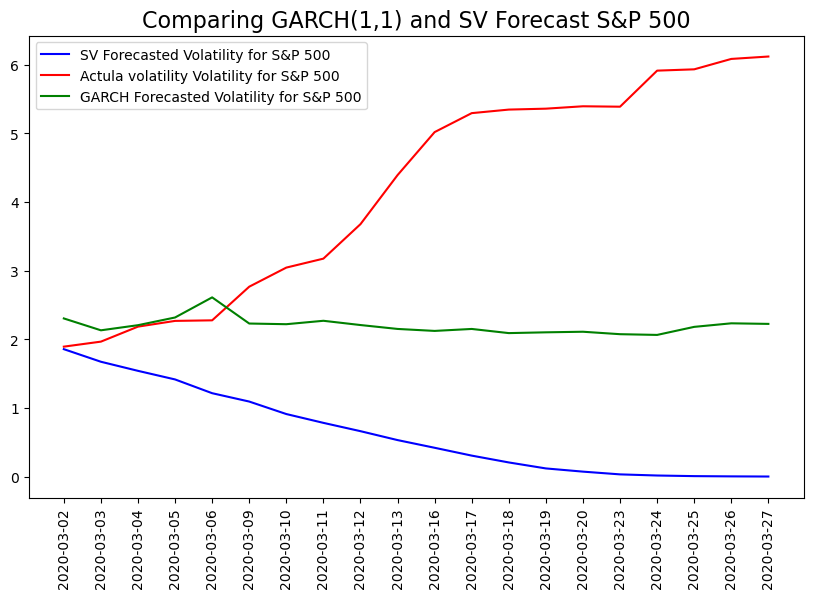

In [122]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(SP500_test.index, SP500_percentage_forecasted, label='SV Forecasted Volatility for S&P 500', color='blue')
#plt.plot(SP500_test.index, SP500_percentage_Actual, label='log volatility to actual volatility')
plt.plot(SP500_test.index, SP500.Volatility[-test_size1:], label='Actula volatility Volatility for S&P 500', color='red')
plt.plot(SP500_test.index, rolling_predictions1, label='GARCH Forecasted Volatility for S&P 500', color='green')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Comparing GARCH(1,1) and SV Forecast S&P 500', fontsize=16)
plt.show()

In [123]:
mse = mean_squared_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Mean Absolute Error (MAE) S&P 500:", mae)

SV Mean Squared Error (MSE) S&P 500: 18.459014014911638
SV Root Mean Squared Error (RMSE) S&P 500: 4.296395467704484
SV Mean Absolute Error (MAE) S&P 500: 3.6765144985274754


In [124]:
mse = mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Mean Absolute Error (MAE) S&P 500:", mae)

GARCH(1,1) Mean Squared Error (MSE) S&P 500: 6.46455113544408
GARCH(1,1) Root Mean Squared Error (RMSE) S&P 500: 2.5425481579399984
GARCH(1,1) Mean Absolute Error (MAE) S&P 500: 2.0717572835708635


In [125]:
print(FTSE_forecasted_volatility)

[0.01677048 0.01623906 0.01522556 0.01468883 0.01314009 0.01281108
 0.01178538 0.01087409 0.01007612 0.00894046 0.00833375 0.00729004
 0.00638666 0.00547894 0.00461173 0.00376222 0.00296651 0.00152405
 0.00101403 0.00058457]


In [126]:
# Convert log volatilities to percentage volatilities
FTSE_percentage_forecasted = 100 * (np.exp(FTSE_forecasted_volatility) - 1)

In [127]:
print(FTSE_percentage_forecasted)

[1.69118901 1.63716339 1.53420585 1.4797242  1.32267971 1.28934982
 1.18551059 1.0933431  1.01270585 0.89805413 0.83685731 0.73166801
 0.64071015 0.54939806 0.46223759 0.37693108 0.29709184 0.15252083
 0.10145471 0.05847433]


In [128]:
# Convert log volatilities to percentage volatilities
FTSE_percentage_Actual = 100* (np.exp(FTSE_test_volatility) - 1)

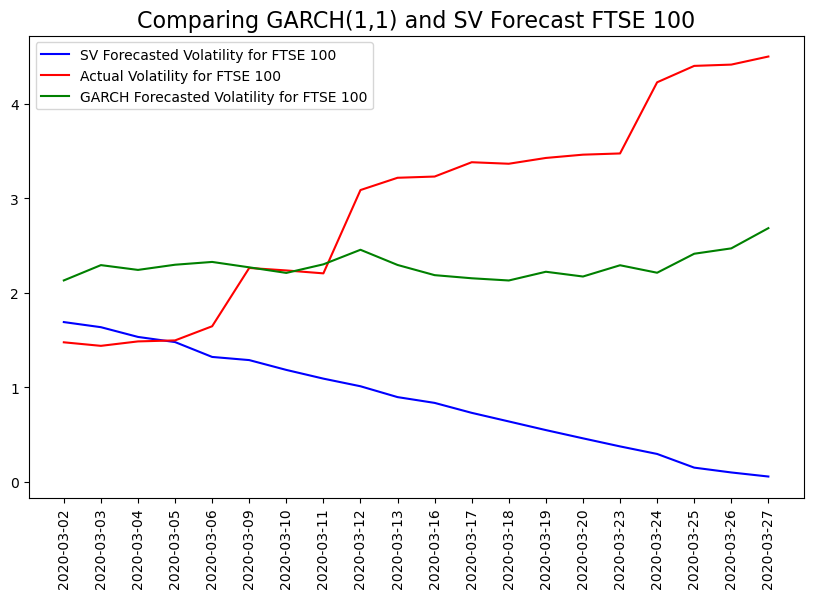

In [129]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(FTSE_test.index, FTSE_percentage_forecasted, label='SV Forecasted Volatility for FTSE 100', color='blue')
#plt.plot(FTSE_test.index, FTSE_percentage_Actual, label='log volatility to actual volatility')
plt.plot(FTSE_test.index, FTSE.Volatility[-test_size1:], label='Actual Volatility for FTSE 100', color='red')
plt.plot(FTSE_test.index, rolling_predictions2, label='GARCH Forecasted Volatility for FTSE 100', color='green')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Comparing GARCH(1,1) and SV Forecast FTSE 100', fontsize=16)
plt.show()

In [130]:
mse = mean_squared_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Mean Absolute Error (MAE) FTSE 100:", mae)

SV Mean Squared Error (MSE) FTSE 100: 7.32542346850987
SV Root Mean Squared Error (RMSE) FTSE 100: 2.706551951932545
SV Mean Absolute Error (MAE) FTSE 100: 2.2203810062594007


In [131]:
mse = mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Mean Absolute Error (MAE) FTSE 100:", mae)

GARCH(1,1) Mean Squared Error (MSE) FTSE 100: 1.3883777107740671
GARCH(1,1) Root Mean Squared Error (RMSE) FTSE 100: 1.1782944075120052
GARCH(1,1) Mean Absolute Error (MAE) FTSE 100: 1.017836111881588
